In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data files into Python

In [2]:
Global_Data = pd.read_csv('D:\Data Analyst NanoDegree\Weather Trends\Global_Temp_Data.csv')
Local_Pune_Data = pd.read_csv('D:\Data Analyst NanoDegree\Weather Trends\Pune_Temp_Data.csv')

In [3]:
Local_Pune_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      218 non-null    int64  
 1   city      218 non-null    object 
 2   country   218 non-null    object 
 3   avg_temp  211 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ KB


In [4]:
Local_Pune_Data

,year,city,country,avg_temp
0,1796,Pune,India,24.39
1,1797,Pune,India,25.17
2,1798,Pune,India,24.05
3,1799,Pune,India,24.68
4,1800,Pune,India,24.67
...,...,...,...,...
213,2009,Pune,India,25.87
214,2010,Pune,India,25.75
215,2011,Pune,India,25.16
216,2012,Pune,India,25.30


In [5]:
Global_Data

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


# FInding non-null values

In [6]:
Local_Pune_Data[Local_Pune_Data['avg_temp'].isnull()==True]

,year,city,country,avg_temp
12,1808,Pune,India,NaN
13,1809,Pune,India,NaN
14,1810,Pune,India,NaN
15,1811,Pune,India,NaN
16,1812,Pune,India,NaN
67,1863,Pune,India,NaN
68,1864,Pune,India,NaN


# Replacing null values with mean of avg_temp to make effect equal

In [7]:
Local_Pune_Data['avg_temp'] = Local_Pune_Data['avg_temp'].fillna(np.mean(Local_Pune_Data['avg_temp']))

In [8]:
Local_Pune_Data.head(20)

,year,city,country,avg_temp
0,1796,Pune,India,24.390000
1,1797,Pune,India,25.170000
2,1798,Pune,India,24.050000
3,1799,Pune,India,24.680000
4,1800,Pune,India,24.670000
5,1801,Pune,India,23.940000
6,1802,Pune,India,25.180000
7,1803,Pune,India,24.950000
8,1804,Pune,India,25.330000
9,1805,Pune,India,24.800000


# Left Join data from Global_data with Local_Pune Data

In [9]:
Total_Data = Local_Pune_Data.merge(Global_Data,how = 'left',on = 'year')

Total_Data

,year,city,country,avg_temp_x,avg_temp_y
0,1796,Pune,India,24.39,8.27
1,1797,Pune,India,25.17,8.51
2,1798,Pune,India,24.05,8.67
3,1799,Pune,India,24.68,8.51
4,1800,Pune,India,24.67,8.48
...,...,...,...,...,...
213,2009,Pune,India,25.87,9.51
214,2010,Pune,India,25.75,9.70
215,2011,Pune,India,25.16,9.52
216,2012,Pune,India,25.30,9.51


# Changing column names

In [10]:
Total_Data = Total_Data.rename(columns = {'avg_temp_x' : 'Local_Temp',
                            'avg_temp_y' : 'Global_Temp'})

Total_Data

,year,city,country,Local_Temp,Global_Temp
0,1796,Pune,India,24.39,8.27
1,1797,Pune,India,25.17,8.51
2,1798,Pune,India,24.05,8.67
3,1799,Pune,India,24.68,8.51
4,1800,Pune,India,24.67,8.48
...,...,...,...,...,...
213,2009,Pune,India,25.87,9.51
214,2010,Pune,India,25.75,9.70
215,2011,Pune,India,25.16,9.52
216,2012,Pune,India,25.30,9.51


# Calculating Moving average for Local data and Global_data

In [15]:
Total_Data['Local_Moving_Average'] = Total_Data['Local_Temp'].rolling(3).mean()
Total_Data['Local_Moving_Average_MinPeriod'] = Total_Data['Local_Temp'].rolling(7,min_periods = 1).mean()



Total_Data['Global_Moving_Average'] = Total_Data['Global_Temp'].rolling(3).mean()
Total_Data['Global_Moving_Average_Min_Period'] = Total_Data['Global_Temp'].rolling(7,min_periods = 1).mean()

In [16]:
Total_Data.head(10)

,year,city,country,Local_Temp,Global_Temp,Local_Moving_Average,Local_Moving_Average_MinPeriod,Global_Moving_Average,Global_Moving_Average_Min_Period
0,1796,Pune,India,24.39,8.27,NaN,24.390000,NaN,8.270000
1,1797,Pune,India,25.17,8.51,NaN,24.780000,NaN,8.390000
2,1798,Pune,India,24.05,8.67,24.536667,24.536667,8.483333,8.483333
3,1799,Pune,India,24.68,8.51,24.633333,24.572500,8.563333,8.490000
4,1800,Pune,India,24.67,8.48,24.466667,24.592000,8.553333,8.488000
5,1801,Pune,India,23.94,8.59,24.430000,24.483333,8.526667,8.505000
6,1802,Pune,India,25.18,8.58,24.596667,24.582857,8.550000,8.515714
7,1803,Pune,India,24.95,8.50,24.690000,24.662857,8.556667,8.548571
8,1804,Pune,India,25.33,8.84,25.153333,24.685714,8.640000,8.595714
9,1805,Pune,India,24.80,8.56,25.026667,24.792857,8.633333,8.580000


# Setting graph size and grid style 

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
sns.set_style('dark')
sns.set_context('poster')

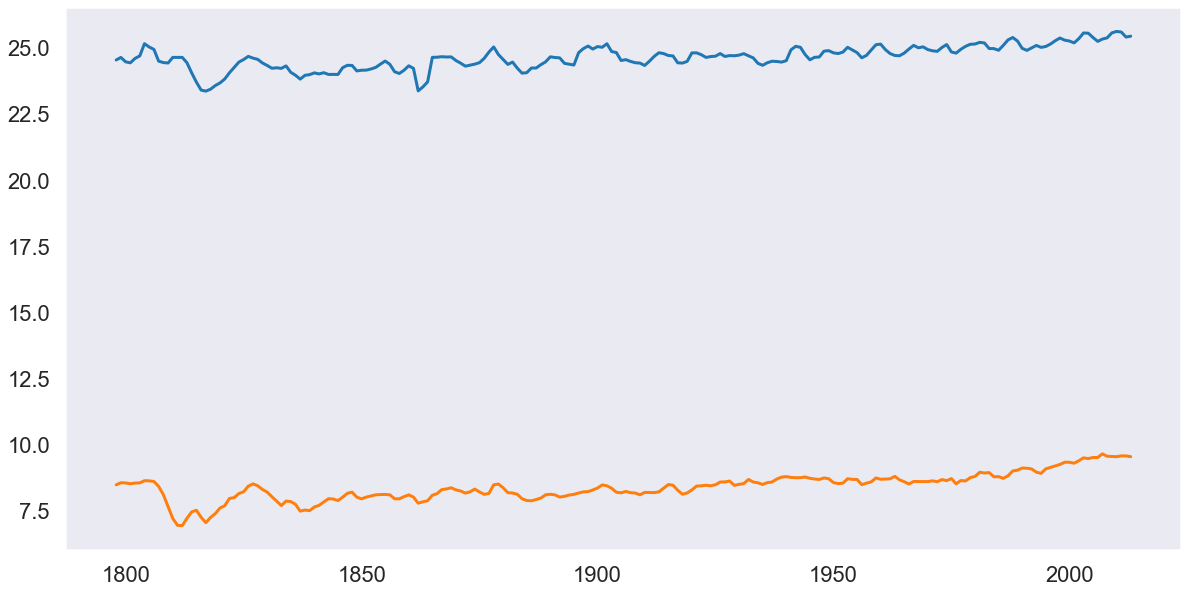

In [17]:
plt.plot(Total_Data['year'],Total_Data['Local_Moving_Average'])
plt.plot(Total_Data['year'],Total_Data['Global_Moving_Average'])